In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from src.models.ig import information_gain



In [13]:
image_path = '../data/raw/still_life/sample_22.mat'
input_data = sio.loadmat(image_path)['data']
visible = input_data[:, :, 0:16] / 255.0
target = input_data[:, :,  26] / 255.0

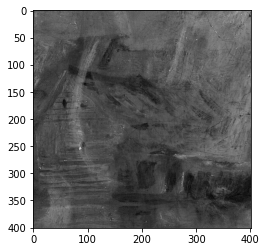

In [14]:
plt.imshow(target, cmap=plt.cm.gray)

In [15]:
ig, approx, net = information_gain(visible, target)

Selecting 25000 samples randomly for use by algorithm.
Adding input layer, width = 16
Adding dense layer, width = 25
Adding dense layer, width = 25
Adding dense layer, width = 1
Compiling model took 0.0349's.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 76us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0054 - val_mean_squared_error: 0.0054

In [16]:
import tensorflow as tf
net.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      [(None, 16)]              0         
_________________________________________________________________
Dense0 (Dense)               (None, 25)                425       
_________________________________________________________________
Dense1 (Dense)               (None, 25)                650       
_________________________________________________________________
Output (Dense)               (None, 1)                 26        
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
_________________________________________________________________


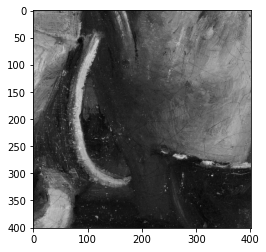

In [17]:
plt.imshow(approx, cmap=plt.cm.gray)

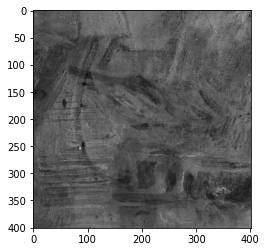

In [18]:
plt.imshow(target-np.squeeze(approx), cmap=plt.cm.gray)

In [19]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table

	return cv2.LUT(image, table)

In [20]:
diff = np.abs(np.squeeze(approx) - target)
gamma_diff = adjust_gamma(
    (diff*255.0).astype(np.uint8),
    1.0
)/255.0

imgs = np.concatenate([target, np.squeeze(approx), gamma_diff], axis=1)
cv2.imshow('Target | Approx | Gamma corr', imgs)
cv2.waitKey(0)
cv2.destroyAllWindows()




In [21]:
plt.imshow(np.squeeze(t), cmap=plt.cm.gray)

NameError: name 't' is not defined

In [ ]:
p = adjust_gamma((np.abs(approx - t)*255.0).astype(np.uint8))
plt.imshow(p, cmap=plt.cm.gray)




